# **SENTIMENT ANALYSIS OF TWITTER DATA**

In [ ]:
#Project About : Sentiment Analysis program that parses the tweets fetched from Twitter using Python

### **Libraries**

In [ ]:
import tweepy
#Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python. Tweepy includes a set 
#of classes and methods that represent Twitter's models and API endpoints, and it transparently handles various implementation details, 
#such as: Data encoding and decoding.

from textblob import TextBlob
#TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language 
#processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
#As TextBlob is a Lexicon-based sentiment analyzer It has some predefined rules or we can say word and weight dictionary, where it has some scores 
#that help to calculate a sentence's polarity. That's why the Lexicon-based sentiment analyzers are also called “Rule-based sentiment analyzers”

from wordcloud import WordCloud
#A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often 
#it's mentioned within a given text and the more important it is. Word clouds are great for visualizing unstructured text data and getting 
#insights on trends and patterns. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for 
#analyzing data from social network websites. EG: MonkeyLearn's free word cloud generator is powered by AI to deliver optimum results.

import pandas as pd
#Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. The Pandas module 
#mainly works with the tabular data, whereas the NumPy module works with the numerical data. The Pandas provides some sets of powerful tools 
#like DataFrame and Series that mainly used for analyzing the data, whereas in NumPy module offers a powerful object called Array.
#Pandas is mainly used for data analysis and associated manipulation of tabular data in DataFrames

import numpy as np
#NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, 
#various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including 
#mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical 
#operations, random simulation and much more.

import re
#The Python "re" module provides regular expression support. In Python a regular expression search is typically written as: 
#match = re. search(pat, str) The re.search() method takes a regular expression pattern and a string and searches for that pattern within the string.

import matplotlib.pyplot as plt
#Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on 
#NumPy arrays. Matplotlib is the whole package; pylab is a module in matplotlib that gets installed alongside matplotlib; and matplotlib. pyplot is  
#a module in matplotlib. Pyplot provides the state-machine interface to the underlying plotting library in matplotlib
#Matplotlib consists of several plots like line, bar, scatter, histogram etc.

plt.style.use('fivethirtyeight') #style of a graph

import warnings
import pickle

**CSV FILE**

In [ ]:
#Load the CSV file (containing API KEYS) here 
from google.colab import files
uploaded = files.upload()

Saving krati.csv to krati.csv


In [ ]:
#save the uploaded above csv file to the variable name "configure"
configure = pd.read_csv('krati.csv')

In [ ]:
configure.head() #details of csv file

,twitterApiKey,twitterApiSecret,twitterApiAccessToken,twitterApiAccessTokenSecret
0,3ylaRVHNb2yCQOJonKFQxT3WF,8Xbh7D5NTqLiOiiNDhr6ZFWDr3Qgd3j2Tl4hIwEHDntaPu...,1415668424525553666-1FxPA7TUANfQFP2lx8fb96I7r2...,eRUcYqdU7Dl0NNTZALSobSKSOaccekrGyINrZSfnJnYxr


**These keys gives the access to the Twitter Live Data Set and are**
**generated from the Twitter developer Account**

In [ ]:
#Twitter API credentials
twitterApiKey = configure['twitterApiKey'][0]
twitterApiSecret = configure['twitterApiSecret'][0]
twitterApiAccessToken=configure['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=configure['twitterApiAccessTokenSecret'][0]

**AUTHENTICATION**

In [ ]:
# Twitter only allows access to a users most recent 3240 tweets with this method


#create the authentication object
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)

#set the access token and access token secret
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)

#Create the API object while passing in the auth information
twitterApi = tweepy.API(auth,wait_on_rate_limit=True) 
#wait_on_rate_limit – Whether or not to automatically wait for rate limits to replenish


**USERNAME OF TWITTER ACCOUNT AND THE NO. OF TWEETS NEED TO BE ANALYZED**

In [ ]:
username = input("Enter the twitter username :")

Enter the twitter username :elonmusk


In [ ]:
c=int(input("Enter the total tweets to perform analysis :"))

Enter the total tweets to perform analysis :50


**Extracting the tweets of the given twitter account**

In [ ]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       #Returns a collection of the most recent Tweets posted by the user indicated by the screen_name

                      screen_name=username, #Specifies the screen name of the user.
                       
                      count = None, 
                       #The number of results to try and retrieve per page. it specifies a maximum number of tweets 
                       #you want to get back, up to 200.
                       
                      since_id = None, 
                       #since_id - Returns results with an ID greater than (that is, more recent than) the specified ID. 
                       #There are limits to the number of Tweets which can be accessed through the API. 
                       #If the limit of Tweets has occured since the since_id, the since_id will be forced to the oldest ID available.

                      max_id = None, #max_id - Returns results with an ID less than (that is, older than) or equal to the specified ID.
                       
                      #So, if you have a given tweet ID, you can search for older or newer tweets by using these
                      # two parameters.(since_id,max_id) ,max_id = top of tweets id list . since_id = bottom of tweets id list .
                      
                      trim_user = True,
                       #A boolean indicating if user IDs should be provided, instead of complete user objects. Defaults to False.

                      exclude_replies = True, 
                      #This parameter will prevent replies from appearing in the returned timeline. Using exclude_replies with the count 
                       #parameter will mean you will receive up-to count Tweets — this is because the count parameter 
                       #retrieves that many Tweets before filtering out retweets and replies.
                       
                      contributor_details=False, #no extra details 
                       
                      #include_rts=False, 
                       #include_rts – When set to false, the timeline will strip any native retweets (though 
                       #they will still count toward both the maximal length of the timeline and the slice selected by 
                       #the count parameter). Note: If you’re using the trim_user parameter in conjunction with include_rts, 
                       #the retweets will still contain a full user object.
                       
                      include_entities = False).items(c); #total c tweets will be extracted
                      


**show the tweets**

In [ ]:
#making of the dataframe of the tweets of the twitter user
df = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=['Tweet'])

In [ ]:
print("Show the 5 recent tweets: \n")
df.head()

Show the 5 recent tweets: 



,Tweet
0,So many interesting posts on Twitter these days!
1,Starship takes beings of Earth to Mars https:/...
2,RT @COLDEX_STC: Despite 30 knot winds at the A...
3,The intelligence of this hive-mind will improv...
4,Anything anyone says will be used against me i...


**clean the tweets**

In [ ]:
# function to clean the tweets
def cleanTxt(text):

  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removal of these words and symbols (removes @mentions)
  #sub- substitute out whatever the pattern we find for an empty string
  #find the pattern by using regular expressions i.e, @ followed by some characters
  #so check for uppercase and lowercase and numbers
  # '+' describes one or more patterns
  # 'r' tells python that the expression is the raw string
  #substitute the pattern found to the empty string - ''
  # 'text' - need to find the pattern of

  text = re.sub(r'#', '', text) #removal of '#'

  text = re.sub(r'RT[\s]+', '', text) #removal of RT - retweets
  #remove the retweets followed by one or more white spaces

  text = re.sub(r'https?:\/\/\S+', '', text) #removal of URL or Hyperlinks
  # "?" used to check if 's' is with http (https) or not (http), means links may have 'https' or 'http'
  #check to see if url followed by one or more non-white spaces

  return text

#Cleaning the text
df['Tweet']=df['Tweet'].apply(cleanTxt) #applying cleaning on tweets

#Show the cleaned text
df #give all extracted tweets or data

,Tweet
0,So many interesting posts on Twitter these days!
1,Starship takes beings of Earth to Mars
2,_STC: Despite 30 knot winds at the Allan Hills...
3,The intelligence of this hive-mind will improv...
4,Anything anyone says will be used against me i...
5,The more Twitter improves its signal to noise ...
6,Trees of thought
7,Great work by Twitter Spaces team!
8,Pretty wild that you can engage in back-and-fo...
9,: Calling all businesses and professionals 📣\n...


**Subjectivity and Polarity**

In [ ]:
from nltk.text import Text
#create the function to get the subjectivity(how subjective or opinionated the text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create the function to get the Polarity (how positive or negative the text is)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two columns one for subjectivity and polarity
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity) #applying subjectivity on tweets
df['Polarity'] = df['Tweet'].apply(getPolarity) #applying polarity on tweets

#Show the new dataframe with the new columns
df


,Tweet,Subjectivity,Polarity
0,So many interesting posts on Twitter these days!,0.500000,0.562500
1,Starship takes beings of Earth to Mars,0.000000,0.000000
2,_STC: Despite 30 knot winds at the Allan Hills...,0.200000,0.100000
3,The intelligence of this hive-mind will improv...,0.837500,0.487500
4,Anything anyone says will be used against me i...,0.000000,0.000000
5,The more Twitter improves its signal to noise ...,0.455952,0.147619
6,Trees of thought,0.000000,0.000000
7,Great work by Twitter Spaces team!,0.750000,1.000000
8,Pretty wild that you can engage in back-and-fo...,0.633333,0.173485
9,: Calling all businesses and professionals 📣\n...,0.500000,0.500000


**Use of Word Cloud on Tweets**

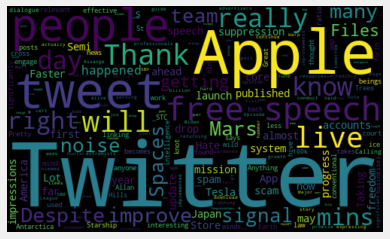

In [ ]:
#Plot the Word Cloud (will show highlighted texts of tweets)
allWords = ' '.join([twts for twts in df['Tweet']]) #storing words of all tweets in a string
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords) #graph parameters

plt.imshow(wordCloud, interpolation = "bilinear")
#The term Bilinear Interpolation is an extension to linear interpolation that performs the interpolation of 
#functions containing two variables (for example, x and y) on a rectilinear two-dimensional grid.

plt.axis('off') #hide the axis
plt.show() #show the plotted graph

**Compute the Polarities**

In [ ]:
#function for positive, neutral, negative analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#new column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getAnalysis) #applying analysis on Polarities by the above function

#show the dataframe
df

,Tweet,Subjectivity,Polarity,Sentiment
0,So many interesting posts on Twitter these days!,0.500000,0.562500,Positive
1,Starship takes beings of Earth to Mars,0.000000,0.000000,Neutral
2,_STC: Despite 30 knot winds at the Allan Hills...,0.200000,0.100000,Positive
3,The intelligence of this hive-mind will improv...,0.837500,0.487500,Positive
4,Anything anyone says will be used against me i...,0.000000,0.000000,Neutral
5,The more Twitter improves its signal to noise ...,0.455952,0.147619,Positive
6,Trees of thought,0.000000,0.000000,Neutral
7,Great work by Twitter Spaces team!,0.750000,1.000000,Positive
8,Pretty wild that you can engage in back-and-fo...,0.633333,0.173485,Positive
9,: Calling all businesses and professionals 📣\n...,0.500000,0.500000,Positive


**Total Positive Tweets**

In [ ]:
sortedDF = df.sort_values(by=['Polarity']) #sort thr dataframe according to the polarity
i=1
for j in range(0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][j] == 'Positive'):
    print(str(i) + ') ' + sortedDF['Tweet'][j])
    i+=1

    #OR
#postweet = df[df.Sentiment == 'Positive']
#postweet = postweet['Tweet']

1) So many interesting posts on Twitter these days!
2) _STC: Despite 30 knot winds at the Allan Hills, Antarctica, where ice cores up to 2,700,000 years old have been found,  St…
3) The intelligence of this hive-mind will improve significantly as signal/noise, effective cross-linking of tweets &amp;… 
4) The more Twitter improves its signal to noise ratio, the less relevant conventional news becomes
5) Great work by Twitter Spaces team! 
6) Pretty wild that you can engage in back-and-forth dialogue with over 100k people live on Twitter Spaces!
7) : Calling all businesses and professionals 📣

Visit our SMB resources page to download the guide to getting the most out…
8) What really happened with the Hunter Biden story suppression by Twitter will be published on Twitter at 5pm ET!
9) Twitter is now serving almost 90 billion tweet impressions per day!

Just how incredibly alive the system actually… 
10) You know Twitter is being fair when extremists on far right and far left are simultane

In [ ]:
print("Toatal Positive Tweets : ",i-1)

#percentage
pos=i-1/(df.shape[0])*100
print('Percentage : '+str(pos)+'%')

#OR
#pos=(postweet.shape[0]/(df.shape[0])*100)

Toatal Positive Tweets :  28
Percentage : 27.0%


**Total Negative Tweets**

In [ ]:
i=1
for j in range(0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][j] == 'Negative'):
    print(str(i) + ') ' + sortedDF['Tweet'][j])
    i+=1 

    #OR
#negtweet = df[df.Sentiment == 'Negative']
#negtweet = negtweet['Tweet']

1) SBF was bad at League. Nuff said.
2) Major Twitter system improvements were implemented this week to drop hammer hard on spam/scam accounts.

Taking jus… 
3) Hate speech impressions ( of times tweet was viewed) continue to decline, despite significant user growth!… 
4) : Tesla Semi driving 500 miles, fully loaded, on a single charge 
5) Did you know Apple puts a secret 30%  tax on everything you buy through their App Store? 


In [ ]:
print("Toatal Negative Tweets : ",i-1)

#percentage
neg=i-1/(df.shape[0])*100
print('Percentage : '+str(neg)+'%')

#OR
#neg=(negtweet.shape[0]/(df.shape[0])*100)

Toatal Negative Tweets :  5
Percentage : 4.0%


**Total Neutral Tweets**

In [ ]:
i=1
for j in range(0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][j] == 'Neutral'):
    print(str(i) + ') ' + sortedDF['Tweet'][j])
    i+=1

        #OR
#neutweet = df[df.Sentiment == 'Neutral']
#neutweet = neutweet['Tweet']

1) Starship takes beings of Earth to Mars 
2) Anything anyone says will be used against me in a court of law… 
3) Trees of thought 
4) I am not expressing an opinion, but did promise to conduct this poll.

Should Assange and Snowden be pardoned?
5) Just a note to thank advertisers for returning to Twitter
6) Twitter servers are running at Warp 9!! 
7) Tune in for Episode 2 of The Twitter Files tomorrow!
8) Here we go!! 🍿🍿 
9) FAFO
10) Tesla Semi Truck launch in 5 mins! 
11) 🇯🇵🇯🇵 Congratulations Japan! 🇯🇵🇯🇵

12) Lot of people stuck in a damn-that’s-crazy ChatGPT loop 🔁
13) Update from  at 6pm PT
14) Twitter core services latency reduced by ~400ms. Should feel noticeably faster.
15) Apple has also threatened to withhold Twitter from its App Store, but won’t tell us why
16) Apple should publish all censorship actions it has taken that affect its customers
17) Who else has Apple censored? 


In [ ]:
print("Toatal Neutral Tweets : ",i-1)

#percentage
neu=i-1/(df.shape[0])*100
print('Percentage : '+str(neu)+'%')

#OR
#neu=(neutweet.shape[0]/(df.shape[0])*100)

Toatal Neutral Tweets :  17
Percentage : 16.0%


**PIE CHART**

In [ ]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['#2146C7','#E0144C','#F0FF42']

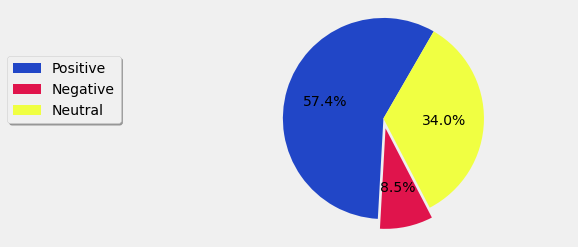

In [ ]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=60)
plt.legend(labels,loc=(-0.5,0.5),shadow=True)
plt.axis('equal')
plt.savefig('Tweet_Sentiment.png')

**SCATTER PLOT**

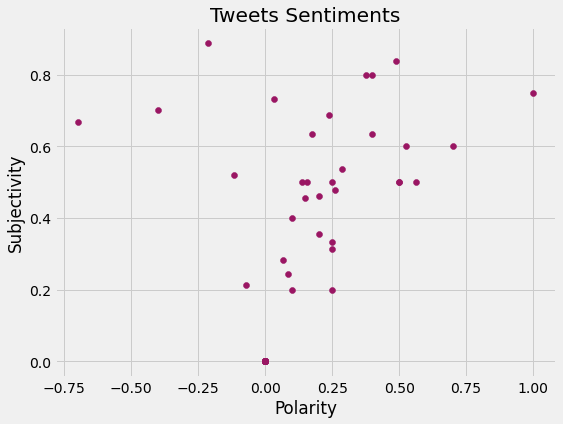

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i] , df['Subjectivity'][i] , color='#9A1663') #shows x-axis , y-axis ,provided colour

plt.title('Tweets Sentiments')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**BAR CHART**

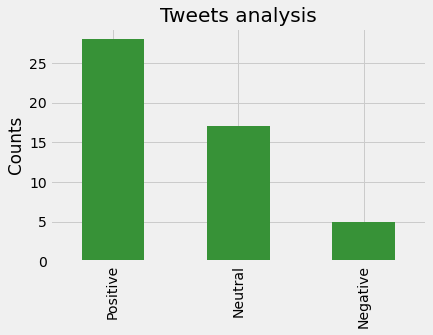

In [ ]:
#show the value counts
df['Sentiment'].value_counts()

#plot and visualise the counts by bar chart
plt.title('Tweets analysis')
plt.ylabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar' , color='#379237')
plt.show()
